# 공공 인공지능 Open API 활용

## 여러개의 그림파일 한번에 검출하기

In [6]:
with open('etriaikey.txt') as kfile:
    etri_key = kfile.read()

In [7]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [8]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
http = urllib3.PoolManager()

In [10]:
from glob import glob
glob('images/*')

['images\\zoo.jpg', 'images\\공원.jpg', 'images\\휴게소.jpg']

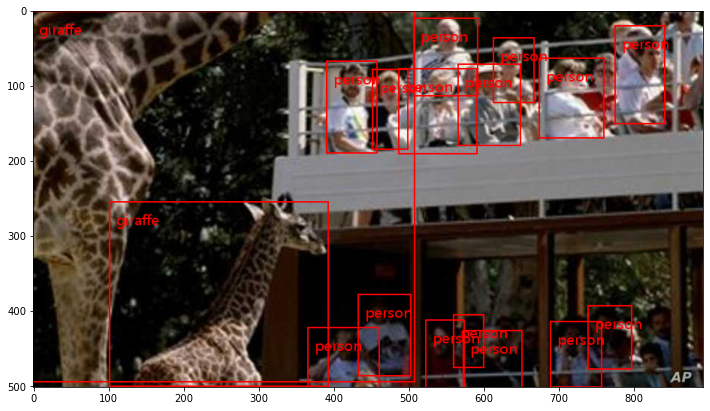

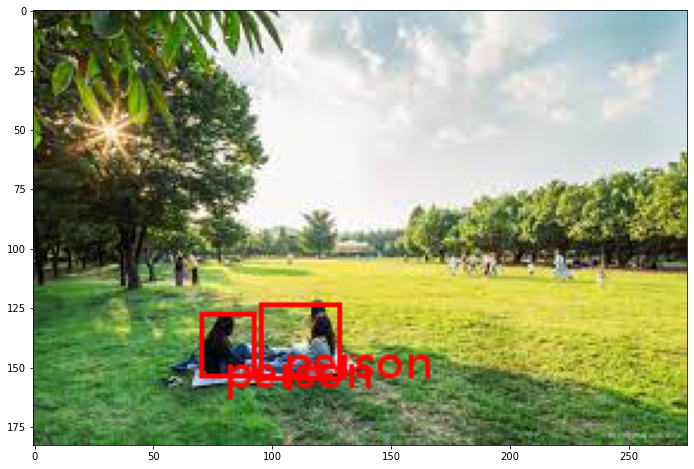

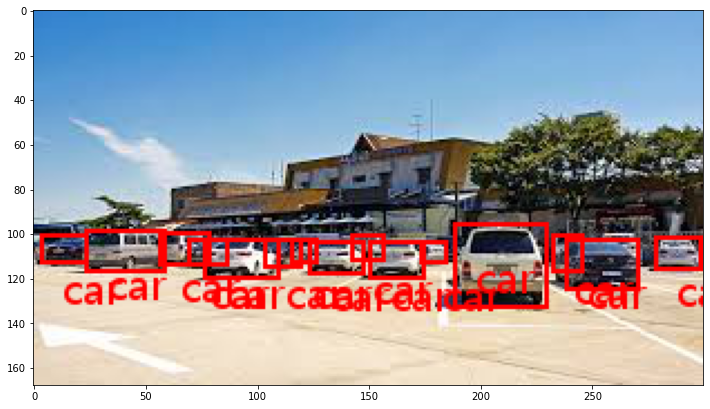

In [11]:
for img_file in glob('images/*'):
    _, image_type = os.path.splitext(img_file)
    image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
    with open(img_file, 'rb') as file:
        image_contents = base64.b64encode(file.read()).decode("utf8")
    
    request_json = {
        "access_key": etri_key,
        "argument": {
            "type": image_type,
            "file": image_contents
        }
    }
    response = http.request(
        "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(request_json)
    )
    result = json.loads(response.data)
    obj_list = result['return_object']['data']

    image = Image.open(img_file)
    draw = ImageDraw.Draw(image)
    for obj in obj_list:
        name = obj['class']
        x = int(obj['x'])
        y = int(obj['y'])
        w = int(obj['width'])
        h = int(obj['height'])
        draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))
        draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
    
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.show()